In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
# import matplotlib.pyplot as plt

In [2]:
# Load the dataset
url = "https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt"
data = pd.read_csv(url)
data.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   645 non-null    int64  
 1   Sqft         645 non-null    float64
 2   Floor        645 non-null    int64  
 3   TotalFloor   645 non-null    int64  
 4   Bedroom      645 non-null    int64  
 5   Living.Room  645 non-null    int64  
 6   Bathroom     645 non-null    int64  
 7   Price        645 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 40.4 KB


In [4]:
# Handle missing values (if any)
data.dropna(inplace=True)

# Encode categorical variables (if any)
# You can use one-hot encoding or label encoding depending on the nature of the categorical features.

# Split the data into features (X) and target (y)
X = data.drop(columns=['Price'])
y = data['Price']


In [6]:
# Display basic statistics about the dataset
data.describe()


,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,325.159690,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,187.312152,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,1.000000,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,164.000000,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,326.000000,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,487.000000,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,648.000000,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Create the KNN Regressor with a specified number of neighbors (you can tune this parameter)
knn_regressor = KNeighborsRegressor(n_neighbors=5)  # Example: 5 neighbors

# Fit the model to the training data
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor()

In [6]:
# Check for missing values
data.isnull().sum()

Unnamed: 0     0
Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

In [8]:
# Check data types of columns
data.dtypes


Unnamed: 0       int64
Sqft           float64
Floor            int64
TotalFloor       int64
Bedroom          int64
Living.Room      int64
Bathroom         int64
Price            int64
dtype: object

In [10]:
# Make predictions on the test set
y_pred = knn_regressor.predict(X_test)

# Evaluate the model (e.g., using Mean Absolute Error)
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')


Mean Absolute Error: 13642.806201550387


In [13]:

# Explore numerical variables
data['Bathroom'].value_counts()

Bathroom
2    386
1    198
3     46
4     10
5      4
0      1
Name: count, dtype: int64

In [11]:
# Drop rows with missing values (handle missing data appropriately in your actual analysis)
data.dropna(inplace=True)

In [16]:
#Show some interesting visualization of the data 
import matplotlib.pyplot as plt
import seaborn as sns

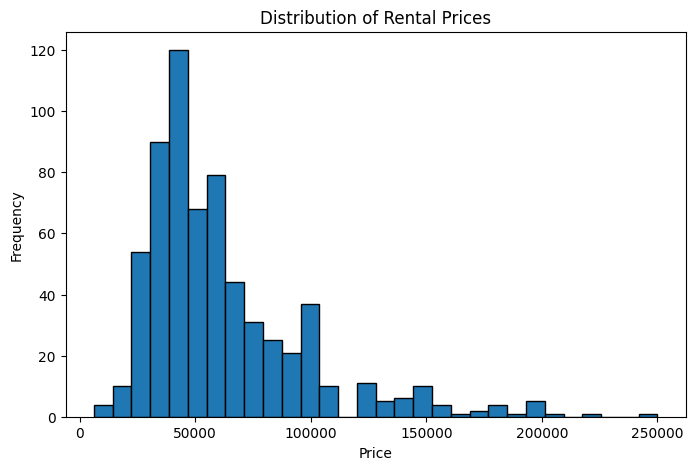

In [15]:
plt.figure(figsize=(8, 5))
plt.hist(data['Price'], bins=30, edgecolor='k')
plt.title('Distribution of Rental Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

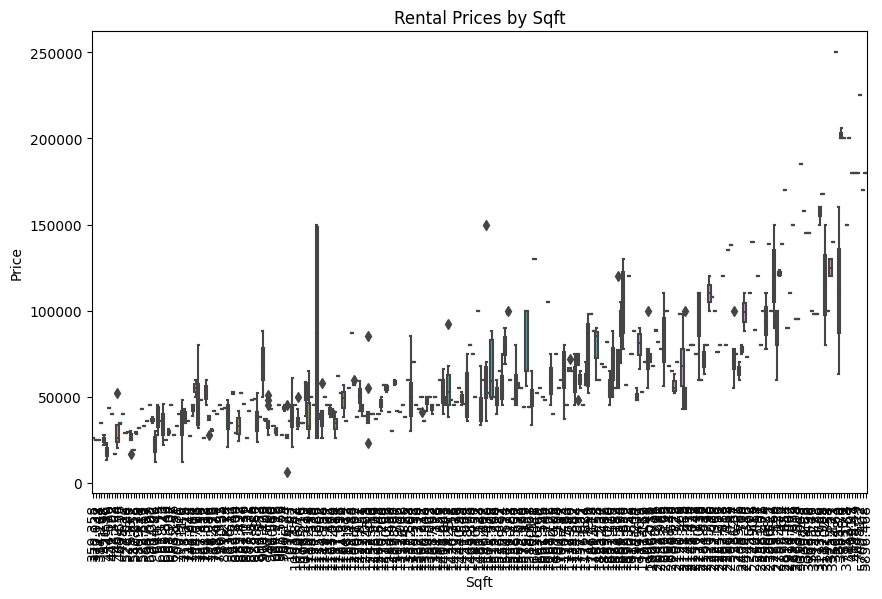

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sqft', y='Price', data=data)
plt.title('Rental Prices by Sqft')
plt.xticks(rotation=90)
plt.xlabel('Sqft')
plt.ylabel('Price')
plt.show()

c:\Users\kalpa\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


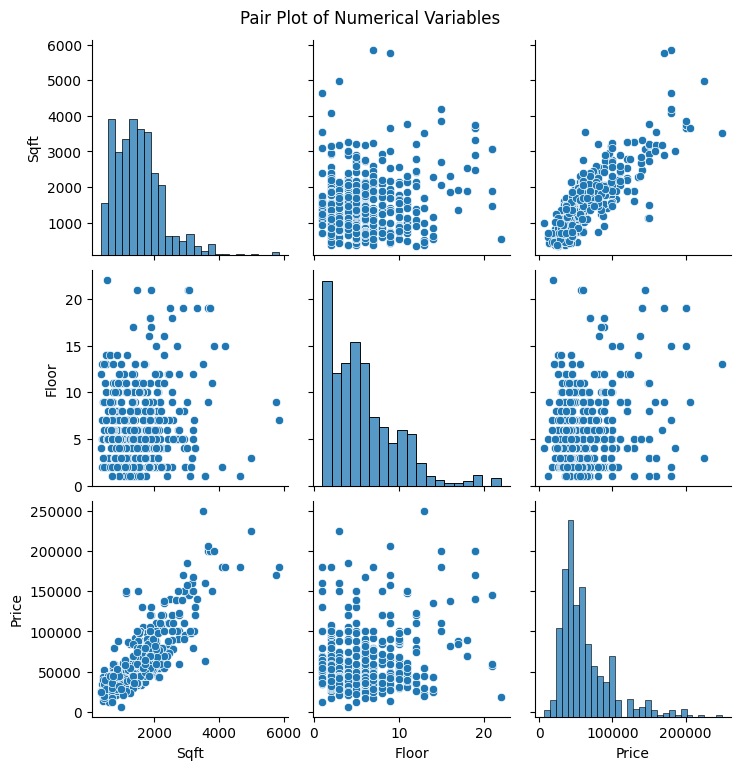

In [24]:
sns.pairplot(data, vars=['Sqft', 'Floor','Price'])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

In [23]:
data.columns

Index(['Unnamed: 0', 'Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room',
       'Bathroom', 'Price'],
      dtype='object')

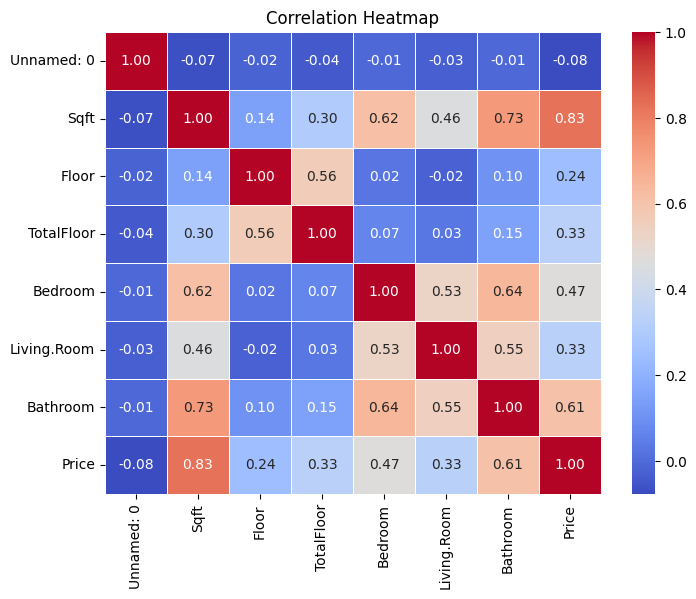

In [25]:
corr_matrix = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

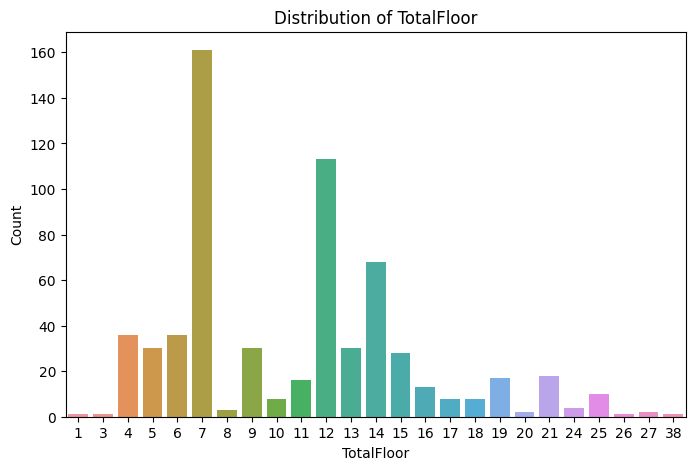

In [29]:
plt.figure(figsize=(8, 5))
sns.countplot(x='TotalFloor', data=data)
plt.title('Distribution of TotalFloor')
plt.xlabel('TotalFloor')
plt.ylabel('Count')
plt.show()

In [32]:
#3. Manage data for training & testing 
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = data.drop(columns=['Price'])  # Features
y = data['Price']  # Target variable

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
# Create and train the KNN Regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = knn_regressor.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 13642.806201550387


In [34]:
#4. Finding a better value of k
from sklearn.model_selection import GridSearchCV
# Define a range of k values to test
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15]}

# Create a KNN Regressor model
knn_regressor = KNeighborsRegressor()

# Use GridSearchCV for hyperparameter tuning with cross-validation
grid_search = GridSearchCV(estimator=knn_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)

# Fit the grid search to your training data
grid_search.fit(X_train, y_train)

# Get the best value of k from the grid search
best_k = grid_search.best_params_['n_neighbors']

print(f'Best k: {best_k}')

Best k: 15


In [35]:
# Create and train the KNN Regressor with the best k value
best_knn_regressor = KNeighborsRegressor(n_neighbors=best_k)
best_knn_regressor.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = best_knn_regressor.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error with Best k: {mae}')

Mean Absolute Error with Best k: 13090.942118863048
